<a href="https://colab.research.google.com/github/NervOUs11/Cat_or_Dog/blob/main/CatVSDog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

In [ ]:
#install kaggle library
!pip install kaggle

In [3]:
#Configuring the path of kaggle.json file
#  !!!!! Upload kaggle.json first !!!!!

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
#Download dataset from kaggle
!kaggle datasets download -d tongpython/cat-and-dog

In [5]:
#Extract the zip file
from zipfile import ZipFile
dataset = '/content/cat-and-dog.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall() 

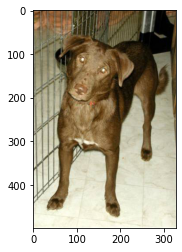

In [6]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as mpimg

# Show dog image
img = mpimg.imread('/content/training_set/training_set/dogs/dog.1.jpg')
imgplt = plt.imshow(img)
plt.show()

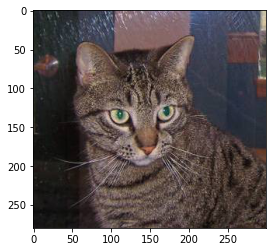

In [7]:
# Show cat image
img = mpimg.imread('/content/training_set/training_set/cats/cat.1.jpg')
imgplt = plt.imshow(img)
plt.show()

In [15]:
# Resize the image
from keras.preprocessing.image import ImageDataGenerator

train_dir = '/content/training_set/training_set'
test_dir = '/content/test_set/test_set'

train_data = ImageDataGenerator(
              rescale=1/255,
              rotation_range=40,
              width_shift_range=0.2,
              height_shift_range=0.2,
              shear_range=0.2,
              zoom_range=0.2,
              horizontal_flip=True,
              fill_mode='nearest')
test_data = ImageDataGenerator(rescale=1/255)

train_data = train_data.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=20,
    class_mode='binary'
)

test_data = test_data.flow_from_directory(
    test_dir,
    target_size=(256,256),
    class_mode='binary'
)

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


In [11]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D 

# Build model
model = Sequential()
model.add(Conv2D(32, (5,5), activation='relu', input_shape = (256,256,3)))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.2))
model.add(Conv2D(32, (5,5), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(40, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 252, 252, 32)      2432      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 126, 126, 32)     0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 126, 126, 32)      0         
                                                                 
 conv2d_3 (Conv2D)           (None, 122, 122, 32)      25632     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 61, 61, 32)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 61, 61, 32)       

In [13]:
# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [16]:
# Train model
history = model.fit(train_data,epochs=40,validation_data=test_data)

Epoch 1/40
401/401 [==============================] - 148s 368ms/step - loss: 0.6932 - accuracy: 0.5006 - val_loss: 0.6932 - val_accuracy: 0.5002
Epoch 2/40
401/401 [==============================] - 146s 363ms/step - loss: 0.6932 - accuracy: 0.4978 - val_loss: 0.6931 - val_accuracy: 0.5007
Epoch 3/40
401/401 [==============================] - 146s 363ms/step - loss: 0.6933 - accuracy: 0.4889 - val_loss: 0.6931 - val_accuracy: 0.5007
Epoch 4/40
401/401 [==============================] - 144s 359ms/step - loss: 0.6932 - accuracy: 0.4999 - val_loss: 0.6932 - val_accuracy: 0.5002
Epoch 5/40
401/401 [==============================] - 145s 361ms/step - loss: 0.6940 - accuracy: 0.5046 - val_loss: 0.6931 - val_accuracy: 0.4998
Epoch 6/40
401/401 [==============================] - 145s 362ms/step - loss: 0.6935 - accuracy: 0.4994 - val_loss: 0.6932 - val_accuracy: 0.4998
Epoch 7/40
401/401 [==============================] - 146s 364ms/step - loss: 0.6932 - accuracy: 0.4963 - val_loss: 0.6932 -

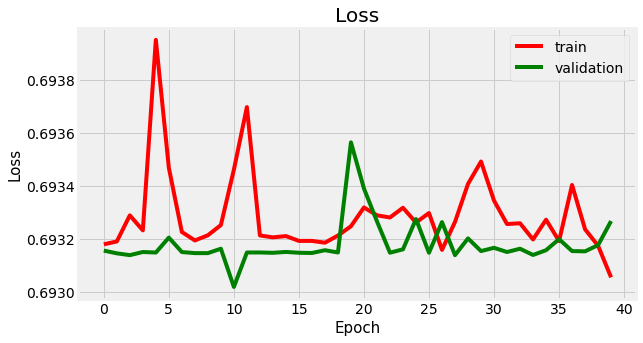

In [17]:
# Show loss
plt.figure(figsize=(10,5))
plt.style.use('fivethirtyeight')
plt.plot(history.history['loss'], color='red',label='train')
plt.plot(history.history['val_loss'], color='green',label='validation')
plt.title('Loss')
plt.xlabel('Epoch',fontsize=15)
plt.ylabel('Loss',fontsize=15)
plt.legend()
plt.show()

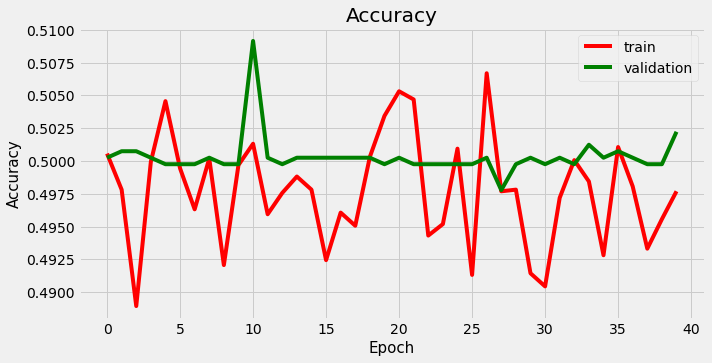

In [18]:
# Show accuracy
plt.figure(figsize=(10,5))
plt.style.use('fivethirtyeight')
plt.plot(history.history['accuracy'], color='red',label='train')
plt.plot(history.history['val_accuracy'], color='green',label='validation')
plt.title('Accuracy')
plt.xlabel('Epoch',fontsize=15)
plt.ylabel('Accuracy',fontsize=15)
plt.legend()
plt.show()

Saving cat.4095.jpg to cat.4095.jpg


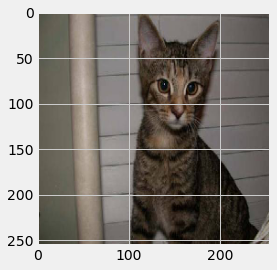

1/1 [==============================] - 0s 175ms/step
A dog , 50.07
-----------------------------------



In [19]:
#Test model (Upload new image)
import numpy as np
from google.colab import files
from keras.utils import load_img, img_to_array

uploaded = files.upload()

for fn in uploaded.keys():
 
  path = '/content/' + fn
  img = load_img(path, target_size=(256, 256))

  imgplt = plt.imshow(img)
  plt.show()

  x = img_to_array(img)
  x = np.expand_dims(x, axis=0)

  image_tensor = np.vstack([x])
  classes = model.predict(image_tensor)
  
  if classes > 0.5:
    print("%s , %.2f" % ("A dog", (classes[0][np.argmax(classes)] * 100)))
    print("-----------------------------------")
    print()
  else:
    print("%s , %.2f" % ("A cat", (classes[0][np.argmax(classes)] * 100)))
    print("-----------------------------------")
    print()